The transformed data is:  [46, -16, 0, -7, 20, -10, -10, 10]
The reconstructed data is:  [66, 26, 46, 46, 46, 46, 56, 36]


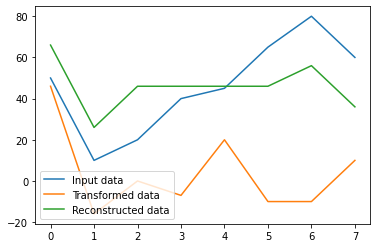

In [1]:
# importing matplotlib library
import matplotlib.pyplot as plt


# utility function to get the smallest power of 2
# greater than or equal to the given number
def power2(x):
    ans = 1
    if x and not(x & (x-1)):
        return x
    while ans < x:
        ans <<= 1
    return ans


# performs HAAR wavelet transformations on the input list
# the recursive function inside performs the wavelet transformation
def transform(inp):
    high = power2(len(inp))

    while len(inp) < high:
        inp.append(0)

    def util(arr, l):
        if l == 1:
            return arr
        mid = l//2
        new_arr = arr.copy()
        for i in range(mid):
            new_arr[i] = (arr[2*i] + arr[2*i+1])//2
            new_arr[i+mid] = arr[2*i] - new_arr[i]

        return util(new_arr, mid)

    transformed = util(inp, len(inp))
    return transformed


# reconstructs new data from the input list after discarding
# values less than the given threshold
def inverse(inp, threshold):
    high = power2(len(inp))

    while len(inp) < high:
        inp.append(0)

    inp = [0 if i < threshold else i for i in inp]

    def inverseUtil(inp, l):
        if l == len(inp):
            return inp

        mid = l*2
        new_arr = inp.copy()
        for i in range(l):
            new_arr[2*i] = inp[i] + inp[i+l]
            new_arr[2*i+1] = inp[i] - inp[i+l]

        return inverseUtil(new_arr, mid)

    reconstructed = inverseUtil(inp, 1)
    return reconstructed


# Example input:
# inp = [ ]
# transformed = transform(inp)
# threshold = 10
# reconstructed = inverse(transformed, threshold)
inp = input("Enter the data values of any size and length: ").split()
inp = [int(i) for i in inp]

transformed = transform(inp)
print("The transformed data is: ", transformed)

threshold = int(input("Enter the threshold value: "))
reconstructed = inverse(transformed, threshold)
print("The reconstructed data is: ", reconstructed)

# Plotting of all the data
plt.plot(inp, label="Input data")
plt.plot(transformed, label="Transformed data")
plt.plot(reconstructed, label="Reconstructed data")
plt.legend(loc="lower left")
plt.show()
